## 1. Supervised Learning Study Guide

## 2. Unsupervised Learning Study Guide

## 3. Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?

In [2]:
import pandas as pd
import numpy as np

ecommerce_df= pd.read_csv('../ecommerce_data.csv')
ecommerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
ecommerce_df['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
556947        1
549037        1
C541284       1
C567440       1
555387        1
Name: InvoiceNo, Length: 25900, dtype: int64

In [5]:
ecommerce_df['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
14351.0       1
13256.0       1
12943.0       1
17923.0       1
13747.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [6]:
ecommerce_df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [7]:
ecommerce_df['InvoiceDate']= pd.to_datetime(ecommerce_df['InvoiceDate'])
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
no_id = ecommerce_df[ecommerce_df['CustomerID'].isnull()]
no_id.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [9]:
no_desc= ecommerce_df[ecommerce_df['Description'].isnull()]
no_desc.tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
511451,579500,22810,NaN,33,2011-11-29 16:14:00,0.0,NaN,United Kingdom
514205,579688,21116,NaN,-33,2011-11-30 13:51:00,0.0,NaN,United Kingdom
514287,579691,47503A,NaN,-5,2011-11-30 14:05:00,0.0,NaN,United Kingdom
514651,579738,21927,NaN,8,2011-11-30 14:26:00,0.0,NaN,United Kingdom
516189,579880,22947,NaN,5,2011-11-30 17:14:00,0.0,NaN,United Kingdom
517719,580087,84341B,NaN,-2,2011-12-01 14:27:00,0.0,NaN,United Kingdom
519967,580197,22696,NaN,6,2011-12-02 12:04:00,0.0,NaN,United Kingdom
521333,580359,20775,NaN,-35,2011-12-02 16:11:00,0.0,NaN,United Kingdom
522160,580379,72225C,NaN,-144,2011-12-02 17:57:00,0.0,NaN,United Kingdom
522162,580381,21758,NaN,-9,2011-12-02 17:58:00,0.0,NaN,United Kingdom


In [10]:
# drop columns where description is null

ecomm_subset= pd.DataFrame(ecommerce_df[ecommerce_df['Description'].notnull()])
ecomm_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


In [11]:
# drop columns where customer ID is null since we're trying to learn about customers
ecomm_subset= pd.DataFrame(ecommerce_df[ecommerce_df['CustomerID'].notnull()])
ecomm_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [12]:
ecomm_subset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
ecomm_subset['InvoiceNo'].value_counts()

576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C560046      1
C553019      1
C562797      1
566009       1
559541       1
Name: InvoiceNo, Length: 22190, dtype: int64

In [14]:
ecomm_subset['StockCode'].value_counts()

85123A    2077
22423     1905
85099B    1662
84879     1418
47566     1416
          ... 
90129E       1
90039C       1
90001A       1
35610B       1
90027A       1
Name: StockCode, Length: 3684, dtype: int64

In [15]:
# identify rows where the invoice number starts with a C

cancel = ecomm_subset.loc[ecomm_subset['InvoiceNo'].str.isnumeric()]
cancel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [16]:
# create a column that will identify cancelled orders vs completed orders
ecomm_subset['OrderComplete'] = ecomm_subset['InvoiceNo'].str.isnumeric()
ecomm_subset.tail(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderComplete
541859,581580,37500,TEA TIME TEAPOT IN GIFT BOX,1,2011-12-09 12:20:00,4.95,12748.0,United Kingdom,True
541860,581581,23562,SET OF 6 RIBBONS PERFECTLY PRETTY,6,2011-12-09 12:20:00,2.89,17581.0,United Kingdom,True
541861,581581,23561,SET OF 6 RIBBONS PARTY,6,2011-12-09 12:20:00,2.89,17581.0,United Kingdom,True
541862,581581,23681,LUNCH BAG RED VINTAGE DOILY,10,2011-12-09 12:20:00,1.65,17581.0,United Kingdom,True
541863,581582,23552,BICYCLE PUNCTURE REPAIR KIT,6,2011-12-09 12:21:00,2.08,17581.0,United Kingdom,True
541864,581582,23498,CLASSIC BICYCLE CLIPS,12,2011-12-09 12:21:00,1.45,17581.0,United Kingdom,True
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777.0,United Kingdom,True
541866,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,2011-12-09 12:23:00,1.85,13777.0,United Kingdom,True
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777.0,United Kingdom,True
541868,581584,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,48,2011-12-09 12:25:00,1.85,13777.0,United Kingdom,True


In [17]:
# transform the rows where there is a C so that they will be numeric values
ecomm_subset['InvoiceNo']=list(map(lambda x: x.replace('C', '1'), ecomm_subset['InvoiceNo']))

In [18]:
ecomm_subset['InvoiceNo'].value_counts()

576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
561062       1
547931       1
1549840      1
1549686      1
1580747      1
Name: InvoiceNo, Length: 22190, dtype: int64

In [19]:
ecomm_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      406829 non-null  object        
 1   StockCode      406829 non-null  object        
 2   Description    406829 non-null  object        
 3   Quantity       406829 non-null  int64         
 4   InvoiceDate    406829 non-null  datetime64[ns]
 5   UnitPrice      406829 non-null  float64       
 6   CustomerID     406829 non-null  float64       
 7   Country        406829 non-null  object        
 8   OrderComplete  406829 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.3+ MB


In [20]:
ecomm_subset['InvoiceNo'] = ecomm_subset['InvoiceNo'].astype(int)
ecomm_subset.info()

# didn't work because there are still some non-numeric values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      406829 non-null  int64         
 1   StockCode      406829 non-null  object        
 2   Description    406829 non-null  object        
 3   Quantity       406829 non-null  int64         
 4   InvoiceDate    406829 non-null  datetime64[ns]
 5   UnitPrice      406829 non-null  float64       
 6   CustomerID     406829 non-null  float64       
 7   Country        406829 non-null  object        
 8   OrderComplete  406829 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 28.3+ MB


In [21]:
#nominal value re-coding
from sklearn.preprocessing import LabelEncoder
desc_labels = LabelEncoder()
ecomm_subset['Description']=desc_labels.fit_transform(ecomm_subset['Description'].values)
ecomm_subset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderComplete
0,536365,85123A,3716,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,True
1,536365,71053,3724,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,True
2,536365,84406B,861,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,True
3,536365,84029G,1813,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,True
4,536365,84029E,2776,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,True


In [22]:
#nominal value re-coding
from sklearn.preprocessing import LabelEncoder
country_labels = LabelEncoder()
ecomm_subset['CountryCode']=country_labels.fit_transform(ecomm_subset['Country'].values)
ecomm_subset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderComplete,CountryCode
0,536365,85123A,3716,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,True,35
1,536365,71053,3724,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,True,35
2,536365,84406B,861,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,True,35
3,536365,84029G,1813,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,True,35
4,536365,84029E,2776,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,True,35


In [23]:
# recode boolean values
ecomm_subset['OrderComplete'] = ecomm_subset['OrderComplete'].astype(int)
ecomm_subset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderComplete,CountryCode
0,536365,85123A,3716,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,35
1,536365,71053,3724,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35
2,536365,84406B,861,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,35
3,536365,84029G,1813,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35
4,536365,84029E,2776,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35


In [24]:
# verify that the description and stockcode are redundant
test = ecomm_subset.loc[ecomm_subset['Description']== 3716]
test

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderComplete,CountryCode
0,536365,85123A,3716,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,35
49,536373,85123A,3716,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,1,35
66,536375,85123A,3716,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,1,35
220,536390,85123A,3716,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,1,35
262,536394,85123A,3716,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,1,35
...,...,...,...,...,...,...,...,...,...,...
537291,581246,85123A,3716,1,2011-12-08 10:59:00,2.95,15453.0,United Kingdom,1,35
537326,581253,85123A,3716,2,2011-12-08 11:15:00,2.95,16891.0,United Kingdom,1,35
537852,581356,85123A,3716,6,2011-12-08 12:28:00,2.95,17830.0,United Kingdom,1,35
539979,581452,85123A,3716,32,2011-12-08 18:03:00,2.55,17675.0,United Kingdom,1,35


In [25]:
ecomm_subset2 = pd.DataFrame(ecomm_subset.drop('StockCode', axis=1))
ecomm_subset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      406829 non-null  int64         
 1   Description    406829 non-null  int64         
 2   Quantity       406829 non-null  int64         
 3   InvoiceDate    406829 non-null  datetime64[ns]
 4   UnitPrice      406829 non-null  float64       
 5   CustomerID     406829 non-null  float64       
 6   Country        406829 non-null  object        
 7   OrderComplete  406829 non-null  int64         
 8   CountryCode    406829 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 31.0+ MB


In [26]:
ecomm_subset2.describe()

,InvoiceNo,Description,Quantity,UnitPrice,CustomerID,OrderComplete,CountryCode
count,4.068290e+05,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,5.824705e+05,2024.692726,12.061303,3.460471,15287.690570,0.978111,32.827731
std,1.466706e+05,1089.177346,248.693370,69.315162,1713.600303,0.146321,6.738565
min,5.363650e+05,0.000000,-80995.000000,0.000000,12346.000000,0.000000,0.000000
25%,5.495460e+05,1143.000000,2.000000,1.250000,13953.000000,1.000000,35.000000
50%,5.623700e+05,1987.000000,5.000000,1.950000,15152.000000,1.000000,35.000000
75%,5.726810e+05,2945.000000,12.000000,3.750000,16791.000000,1.000000,35.000000
max,1.581569e+06,3895.000000,80995.000000,38970.000000,18287.000000,1.000000,36.000000


In [27]:
negative = ecomm_subset2.loc[ecomm_subset2['Quantity'] < 0]
negative

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderComplete,CountryCode
141,1536379,1066,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,0,35
154,1536383,3016,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,0,35
235,1536391,2581,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0,35
236,1536391,2247,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0,35
237,1536391,2238,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0,35
...,...,...,...,...,...,...,...,...,...
540449,1581490,3891,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,0,35
541541,1581499,2140,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,0,35
541715,1581568,3551,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,0,35
541716,1581569,1576,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,0,35


In [28]:
canceled = ecomm_subset2.loc[ecomm_subset2['OrderComplete'] < 1]
canceled.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderComplete,CountryCode
141,1536379,1066,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,0,35
154,1536383,3016,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,0,35
235,1536391,2581,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0,35
236,1536391,2247,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0,35
237,1536391,2238,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0,35


In [29]:
canceled = canceled.drop('OrderComplete', axis =1)
canceled.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CountryCode
141,1536379,1066,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,35
154,1536383,3016,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,35
235,1536391,2581,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,35
236,1536391,2247,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,35
237,1536391,2238,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,35


In [30]:
canceled.describe()

,InvoiceNo,Description,Quantity,UnitPrice,CustomerID,CountryCode
count,8.905000e+03,8905.000000,8905.000000,8905.000000,8905.000000,8905.000000
mean,1.559000e+06,2016.218304,-30.859966,18.845519,14991.667266,31.990118
std,1.297559e+04,1073.924406,1170.154939,444.366043,1706.772357,7.807784
min,1.536379e+06,1.000000,-80995.000000,0.010000,12346.000000,0.000000
25%,1.547388e+06,1094.000000,-6.000000,1.450000,13510.000000,35.000000
50%,1.559670e+06,2056.000000,-2.000000,2.950000,14895.000000,35.000000
75%,1.569995e+06,2878.000000,-1.000000,4.950000,16393.000000,35.000000
max,1.581569e+06,3893.000000,-1.000000,38970.000000,18282.000000,35.000000


In [31]:
completed = ecomm_subset2.loc[ecomm_subset2['OrderComplete'] > 0]
completed.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderComplete,CountryCode
0,536365,3716,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,35
1,536365,3724,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35
2,536365,861,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,35
3,536365,1813,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35
4,536365,2776,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,35


In [32]:
completed = completed.drop('OrderComplete', axis =1)
completed.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CountryCode
0,536365,3716,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,35
1,536365,3724,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,35
2,536365,861,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,35
3,536365,1813,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,35
4,536365,2776,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,35


In [33]:
completed.describe()

,InvoiceNo,Description,Quantity,UnitPrice,CustomerID,CountryCode
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,2024.882372,13.021823,3.116174,15294.315171,32.846476
std,13106.167695,1089.516820,180.420210,22.096788,1713.169877,6.711504
min,536365.000000,0.000000,1.000000,0.000000,12346.000000,0.000000
25%,549234.000000,1143.000000,2.000000,1.250000,13969.000000,35.000000
50%,561893.000000,1987.000000,6.000000,1.950000,15159.000000,35.000000
75%,572090.000000,2947.000000,12.000000,3.750000,16795.000000,35.000000
max,581587.000000,3895.000000,80995.000000,8142.750000,18287.000000,36.000000


In [34]:
completed.loc[completed['Quantity']== 80995]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CountryCode
540421,581483,2329,80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,35


In [35]:
canceled.loc[canceled['Quantity']== -80995]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CountryCode
540422,1581484,2329,-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,35


## 4.	Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

I ended up looking at subsets of data, first focusing on completed (non-canceled) orders, and then within that subset I looked specifically at customers and countries, customers and invoices, and customers and descriptions the idea being that it might be useful to see where most of my customers are, how often they order again (invoices) and what things they're ordering (descriptions).
The ideal number of clusters appeared to be 3 and I used inertia to determine it.

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#scaler = StandardScaler()
#kmeans= KMeans()

#from sklearn.pipeline import make_pipeline
#pipeline = make_pipeline(scaler, kmeans)
to_drop = completed[['Country', 'InvoiceDate']]
X = completed.drop(to_drop, axis=1)
y = completed['Country']




In [116]:
inertias = []
distortions = []
for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k).fit(X)
    

    
    inertia = model.inertia_
    inertias.append(inertia)


Text(0.5, 1.0, 'Elbow Method with Inertia')

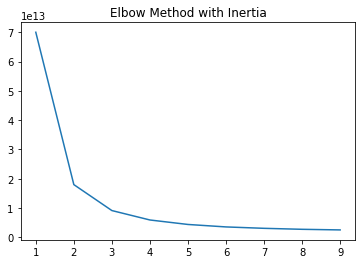

In [118]:
import matplotlib.pyplot as plt
plt.plot(range(1,10),inertias)
plt.title('Elbow Method with Inertia')

Text(0.5, 1.0, 'Elbow Method with Inertia')

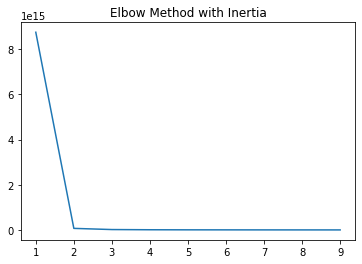

In [119]:
to_drop = ecomm_subset2[['Country', 'InvoiceDate', 'OrderComplete']]
X = ecomm_subset2.drop(to_drop, axis=1)
y = ecomm_subset2['Country']

inertias = []
distortions = []
for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k).fit(X)
    

    
    inertia = model.inertia_
    inertias.append(inertia)

plt.plot(range(1,10),inertias)
plt.title('Elbow Method with Inertia')

Text(0.5, 1.0, 'Elbow Method with Inertia')

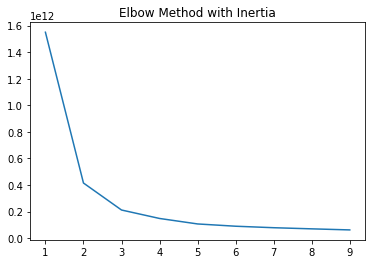

In [120]:
to_drop = canceled[['Country', 'InvoiceDate']]
X = canceled.drop(to_drop, axis=1)
y = canceled['Country']

inertias = []
distortions = []
for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k).fit(X)
    

    
    inertia = model.inertia_
    inertias.append(inertia)

plt.plot(range(1,10),inertias)
plt.title('Elbow Method with Inertia')

Text(0.5, 1.0, 'Elbow Method with Inertia')

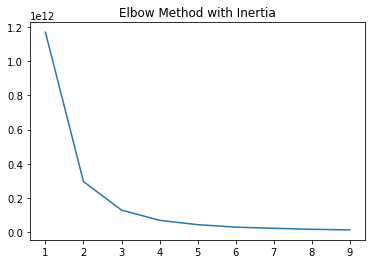

In [50]:
X = completed[['CountryCode', 'CustomerID']]
y = completed['Country']

inertias = []
distortions = []
for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k).fit(X)
    

    
    inertia = model.inertia_
    inertias.append(inertia)

plt.plot(range(1,10),inertias)
plt.title('Elbow Method with Inertia')

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans= KMeans(n_clusters=3)

from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)

from sklearn.model_selection import train_test_split

#to_drop = completed[['Country', 'InvoiceDate']]
X = completed[['CountryCode', 'CustomerID']]
y = completed['Country']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [43]:
labels = pipeline.predict(X)

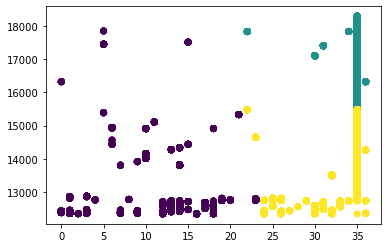

In [44]:
#xs = X[]
import matplotlib.pyplot as plt
plt.scatter(X['CountryCode'], X['CustomerID'] , c=labels)
plt.show()

#print(X.shape, y.shape)

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans= KMeans(n_clusters=3)

from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler, kmeans)

#from sklearn.model_selection import train_test_split

#to_drop = completed[['Country', 'InvoiceDate']]
X = completed[['Description', 'CustomerID']]
y = completed['Country']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

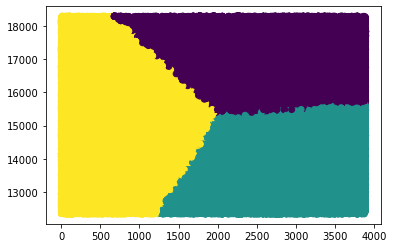

In [46]:
labels = pipeline.predict(X)

import matplotlib.pyplot as plt
plt.scatter(X['Description'], X['CustomerID'] , c=labels)
plt.show()


Text(0.5, 1.0, 'Elbow Method with Inertia')

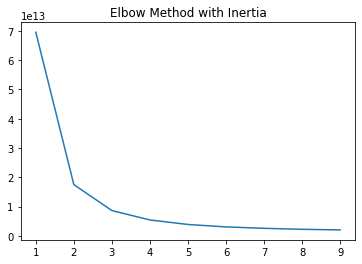

In [49]:
X = completed[['InvoiceNo', 'CustomerID']]
y = completed['Country']

inertias = []
distortions = []
for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k).fit(X)
    

    
    inertia = model.inertia_
    inertias.append(inertia)

plt.plot(range(1,10),inertias)
plt.title('Elbow Method with Inertia')

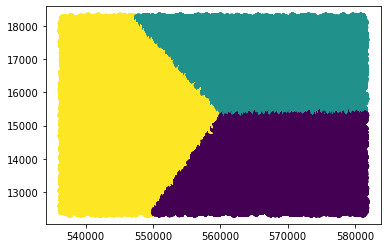

In [48]:
X = completed[['InvoiceNo', 'CustomerID']]
y = completed['Country']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

pipeline.fit(X)

labels = pipeline.predict(X)

import matplotlib.pyplot as plt
plt.scatter(X['InvoiceNo'], X['CustomerID'] , c=labels)
plt.show()


## 5.	Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

I had to break up my data to get anything to run because my kernel kept dying when I tried the full dataset.
Agglomerative clustering on the first and third 1000 rows seemed to indicate that the best number of clusters might be two rather than three but I think you could possibly go either way. 

My dendrogram was too difficult to comprehend.

In [37]:
completed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  int64         
 1   Description  397924 non-null  int64         
 2   Quantity     397924 non-null  int64         
 3   InvoiceDate  397924 non-null  datetime64[ns]
 4   UnitPrice    397924 non-null  float64       
 5   CustomerID   397924 non-null  float64       
 6   Country      397924 non-null  object        
 7   CountryCode  397924 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 27.3+ MB


In [42]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

to_drop = completed[['InvoiceDate', 'Country', 'CountryCode']]
to_cluster = pd.DataFrame(completed.drop(to_drop, axis =1))

X = to_cluster.loc[:1000,:]
#y = completed[:1000, 6]

sc = StandardScaler()
X = sc.fit_transform(X)

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [69]:
X = to_cluster.loc[1001:2000,:]
#y = completed[:1000, 6]

sc = StandardScaler()
X = sc.fit_transform(X)

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,

In [70]:
X = to_cluster.loc[2001:3000,:]
#y = completed[:1000, 6]

sc = StandardScaler()
X = sc.fit_transform(X)

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2,

In [67]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

to_drop = completed[['InvoiceDate', 'Country', 'CountryCode']]
to_cluster = pd.DataFrame(completed.drop(to_drop, axis =1))

countries = completed.iloc[:989,6]

X = to_cluster.loc[:500,:]
y = countries

sc = StandardScaler()
X = sc.fit_transform(X)

linked = linkage(X)


In [63]:
print(linked.shape, y.shape)

(989, 4) (989,)


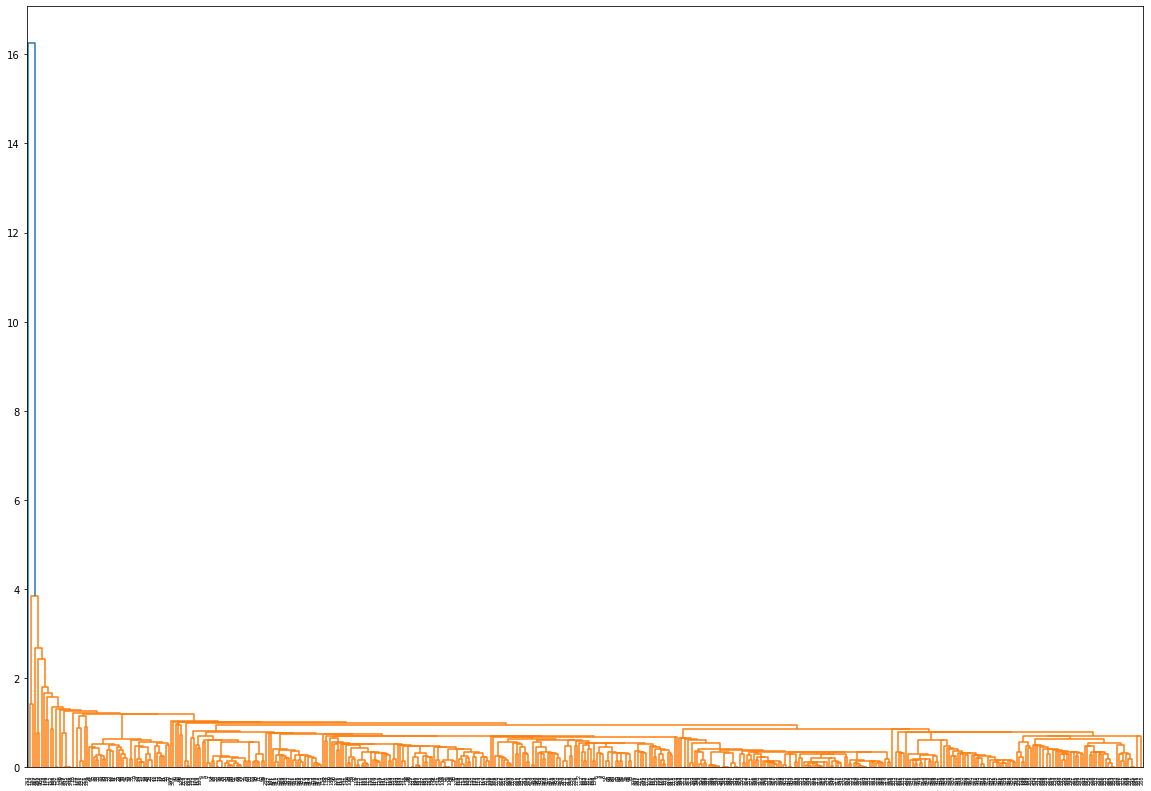

In [68]:
plt.figure(figsize=(20,14))

dendro = dendrogram(linked)
plt.show()

## Question 6
I preferred KMeans because it allowed me to look at more data at once. I'm a little bit concerned that breaking my data into chunks for the hierarchical clustering is skewing my results.